In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import statistics

In [2]:
df = pd.read_csv('koi_data.csv')
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [3]:
df['koi_disposition']= df['koi_disposition'].map({'CONFIRMED':1, 'FALSE POSITIVE':0})
df

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,0,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,0,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,K08198.01,0,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,K07984.01,0,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,K07985.01,0,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,K07987.01,0,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


In [4]:
X = df.loc[:, 'koi_period':'koi_dikco_msky']
y = df['koi_disposition']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3901, 41), (1301, 41), (3901,), (1301,))

In [6]:
y_test.values

array([1, 1, 1, ..., 0, 1, 0])

In [7]:
#y_pred = gnb.predict(X_test)
#y_pred

In [8]:
#print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test.values, y_pred)))

In [9]:
fold = KFold(n_splits=5)
accuracy = []
for train, test in fold.split(df.values):
	#print('train: %s, test: %s' % (df.values[train], df.values[test]))
	X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
	X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
	y_train = df['koi_disposition'].values[train]
	y_test = df['koi_disposition'].values[test]
	model = GaussianNB()
	model.fit(X_train, y_train)
	y_pred = model.predict(y_test.reshape(-1,1))
	accuracy.append(accuracy_score(y_test, y_pred))

In [10]:
statistics.mean(accuracy)

0.5956633784083352

In [64]:
fold = KFold(n_splits=5)
dic = {'n':[], 'accuracy':[]}
for n in range(1,11):
	accuracy = []
	if (n==10): n=None
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]

		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		model = DecisionTreeClassifier(max_depth=n)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	dic['n'].append(n)
	dic['accuracy'].append(np.mean(accuracy))
	print('n: %s, accuracy: %s' % (n, np.mean(accuracy)))



n: 1, accuracy: 0.6791114313160423
n: 2, accuracy: 0.8383464494199364
n: 3, accuracy: 0.9229097391561369
n: 4, accuracy: 0.9348293061405453
n: 5, accuracy: 0.9419461686248429
n: 6, accuracy: 0.944827458804404
n: 7, accuracy: 0.9459805660237937
n: 8, accuracy: 0.9440573043671027
n: 9, accuracy: 0.9432880735978719
n: None, accuracy: 0.9365656173797383


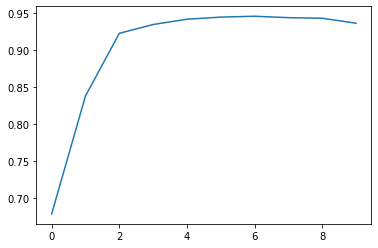

In [65]:
plt.plot(dic['accuracy'])

In [22]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fold = KFold(n_splits=5)
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
for i in kernels:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		if (kernels == 'linear'):
			model = svm.SVC(kernel=i, max_iter=10000)
		else:
			model = svm.SVC(kernel=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	print('kernel: %s, accuracy: %s' % (i, np.mean(accuracy)))



kernel: linear, accuracy: 0.9031120224636074
kernel: sigmoid, accuracy: 0.527484297642799
kernel: poly, accuracy: 0.9146466045961723
kernel: rbf, accuracy: 0.8800472918052169


In [56]:
from sklearn.neighbors import KNeighborsClassifier
n = list(range(1, 16))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		model = KNeighborsClassifier(n_neighbors=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('nl: %s, accuracy: %s' % (i, np.mean(accuracy)))




nl: 1, accuracy: 0.7860396807803148
nl: 2, accuracy: 0.7908723121259145
nl: 3, accuracy: 0.8091016404344934
nl: 4, accuracy: 0.8168089115495455
nl: 5, accuracy: 0.8098675459986697
nl: 6, accuracy: 0.815261952264834
nl: 7, accuracy: 0.8092869282494644
nl: 8, accuracy: 0.813335550136703
nl: 9, accuracy: 0.8081328973620041
nl: 10, accuracy: 0.812756225522796
nl: 11, accuracy: 0.8040949900243849
nl: 12, accuracy: 0.8092939481268011
nl: 13, accuracy: 0.802941698071381
nl: 14, accuracy: 0.8075605926254342
nl: 15, accuracy: 0.8031327126283898


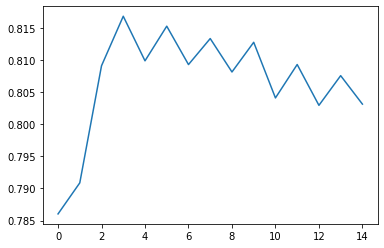

In [57]:
plt.plot(listt)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
n = list(range(1, 17))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		if (i==n[-1]):
			model = RandomForestClassifier(max_depth=None)
		else:
			model = RandomForestClassifier(max_depth=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('n: %s, accuracy: %s' % (i, np.mean(accuracy)))




n: 1, accuracy: 0.6070095322544891
n: 2, accuracy: 0.8808229882509421
n: 3, accuracy: 0.9094570679080765
n: 4, accuracy: 0.9267564472031331
n: 5, accuracy: 0.9384837064952339
n: 6, accuracy: 0.9463649966747949
n: 7, accuracy: 0.9538646272075667
n: 8, accuracy: 0.9546338579767975
n: 9, accuracy: 0.9579019803443435
n: 10, accuracy: 0.9586712111135742
n: 11, accuracy: 0.9594400724155767
n: 12, accuracy: 0.9579032734796422
n: 13, accuracy: 0.9575193970294835
n: 14, accuracy: 0.9577109657873347
n: 15, accuracy: 0.9582891819995567
n: 16, accuracy: 0.9582882583314861


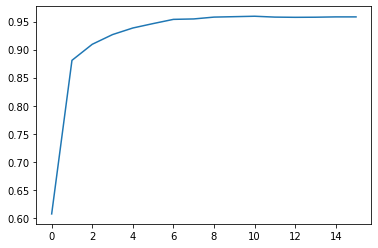

In [69]:
plt.plot(listt)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
n = list(range(1, 100))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		model = GradientBoostingClassifier(n_estimators=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('n: %s, accuracy: %s' % (i, np.mean(accuracy)))




n: 1, accuracy: 0.5937403014852582
n: 2, accuracy: 0.5910479937929505
n: 3, accuracy: 0.6579710707160275
n: 4, accuracy: 0.8656583906007537
n: 5, accuracy: 0.8746783787778023
n: 6, accuracy: 0.8944753565358752
n: 7, accuracy: 0.913117010271189
n: 8, accuracy: 0.9158030370206163
n: 9, accuracy: 0.9252235276730953
n: 10, accuracy: 0.929644757260031
n: 11, accuracy: 0.9290670952486515
n: 12, accuracy: 0.9323359565506539
n: 13, accuracy: 0.9375278947757334
n: 14, accuracy: 0.9350275253085052
n: 15, accuracy: 0.9413720165521319
n: 16, accuracy: 0.9407943545407523
n: 17, accuracy: 0.9421403236532919
n: 18, accuracy: 0.9423330008128279
n: 19, accuracy: 0.9452165077957586
n: 20, accuracy: 0.9465624769082982
n: 21, accuracy: 0.9475240153698368
n: 22, accuracy: 0.945985184364147
n: 23, accuracy: 0.9477146604596172
n: 24, accuracy: 0.9486754599866991
n: 25, accuracy: 0.9505981674425479
n: 26, accuracy: 0.9502135520579325
n: 27, accuracy: 0.9504064139510826
n: 28, accuracy: 0.9513670287445504
n: 2

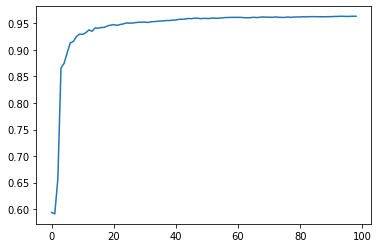

In [76]:
plt.plot(listt)

In [77]:
from sklearn.metrics import roc_curve
